In [1]:
%matplotlib inline


# Individual Storm Analysis
This sample script illustrates how to retrieve a single storm from the HURDAT2 dataset, and make plots and analyses of this storm.

For documentation generation purposes, return_ax must be set True for plotting functions. You don't need to have this extra argument in every plotting function call (e.g., "storm.plot(return_ax=True)" will produce the same output as "storm.plot()").



In [2]:
import tropycal.tracks as tracks
import datetime as dt

/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/recon/dataset.py:630: SyntaxWarning: "is" with a literal. Did you mean "=="?
/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/recon/dataset.py:630: SyntaxWarning: "is" with a literal. Did you mean "=="?


## HURTDAT2 Dataset
Let's start by creating an instance of a TrackDataset object. By default, this reads in the HURDAT2 dataset from the National Hurricane  Center (NHC) website. For this example we'll be using the HURDAT2 dataset over the North Atlantic basin.

HURDAT data is not available for the most recent hurricane seasons. To include the latest data up through today, the "include_btk" flag  would need to be set to True, which reads in preliminary best track data from the NHC website.



In [3]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (3.49 seconds)


## Individual storm analysis
Individual storms can be retrieved from the dataset by calling the ``get_storm()`` function, which returns an instance of a Storm object. This can be done by either entering a tuple containing the storm name and year, or by the standard tropical cyclone ID (e.g., "AL012019").

Let's retrieve an instance of Hurricane Michael from 2018:



In [4]:
storm = hurdat_atl.get_storm(('michael',2018))

This instance of Storm contains several methods that return the storm data back in different data types. The following examples will show # how to retrieve 3 different data types.

Retrieve a dictionary of Michael's data:



In [5]:
print(storm.to_dict())

{'id': 'AL142018', 'operational_id': 'AL142018', 'name': 'MICHAEL', 'year': 2018, 'season': 2018, 'basin': 'north_atlantic', 'source_info': 'NHC Hurricane Database', 'source': 'hurdat', 'date': [datetime.datetime(2018, 10, 6, 18, 0), datetime.datetime(2018, 10, 7, 0, 0), datetime.datetime(2018, 10, 7, 6, 0), datetime.datetime(2018, 10, 7, 12, 0), datetime.datetime(2018, 10, 7, 18, 0), datetime.datetime(2018, 10, 8, 0, 0), datetime.datetime(2018, 10, 8, 6, 0), datetime.datetime(2018, 10, 8, 12, 0), datetime.datetime(2018, 10, 8, 18, 0), datetime.datetime(2018, 10, 9, 0, 0), datetime.datetime(2018, 10, 9, 6, 0), datetime.datetime(2018, 10, 9, 12, 0), datetime.datetime(2018, 10, 9, 18, 0), datetime.datetime(2018, 10, 10, 0, 0), datetime.datetime(2018, 10, 10, 6, 0), datetime.datetime(2018, 10, 10, 12, 0), datetime.datetime(2018, 10, 10, 17, 30), datetime.datetime(2018, 10, 10, 18, 0), datetime.datetime(2018, 10, 11, 0, 0), datetime.datetime(2018, 10, 11, 6, 0), datetime.datetime(2018, 10,

Retrieve xarray Dataset object with Michael's data:



In [6]:
print(storm.to_xarray())

<xarray.Dataset>
Dimensions:    (time: 38)
Coordinates:
  * time       (time) datetime64[ns] 2018-10-06T18:00:00 ... 2018-10-15T18:00:00
Data variables:
    extra_obs  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
    type       (time) <U2 'LO' 'LO' 'TD' 'TS' 'TS' ... 'EX' 'EX' 'EX' 'EX' 'EX'
    lat        (time) float64 17.8 18.1 18.4 18.8 19.1 ... 45.9 44.4 42.8 41.2
    lon        (time) float64 -86.6 -86.9 -86.8 -86.4 ... -11.4 -10.3 -10.0
    vmax       (time) int64 25 25 30 35 45 50 60 65 ... 65 65 60 55 55 50 35 35
    mslp       (time) int64 1006 1004 1004 1003 999 996 ... 978 982 989 996 1001
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane D

Retrieve pandas DataFrame object with Michael's data:



In [7]:
print(storm.to_dataframe())

                  date  extra_obs special type   lat   lon  vmax  mslp  \
0  2018-10-06 18:00:00          0           LO  17.8 -86.6    25  1006   
1  2018-10-07 00:00:00          0           LO  18.1 -86.9    25  1004   
2  2018-10-07 06:00:00          0           TD  18.4 -86.8    30  1004   
3  2018-10-07 12:00:00          0           TS  18.8 -86.4    35  1003   
4  2018-10-07 18:00:00          0           TS  19.1 -85.7    45   999   
5  2018-10-08 00:00:00          0           TS  19.7 -85.5    50   996   
6  2018-10-08 06:00:00          0           TS  20.2 -85.4    60   984   
7  2018-10-08 12:00:00          0           HU  20.9 -85.1    65   982   
8  2018-10-08 18:00:00          0           HU  21.7 -85.1    75   977   
9  2018-10-09 00:00:00          0           HU  22.7 -85.2    85   971   
10 2018-10-09 06:00:00          0           HU  23.7 -85.8    85   973   
11 2018-10-09 12:00:00          0           HU  24.6 -86.2    90   968   
12 2018-10-09 18:00:00          0     

Visualize Michael's observed track with the "plot" function:

Note that you can pass various arguments to the plot function, such as customizing the map and track aspects. The only cartopy projection # currently offered is PlateCarree. Read through the documentation for more customization options.



/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<GeoAxesSubplot:title={'left':'Hurricane MICHAEL','right':'07 Oct 2018 – 11 Oct 2018\n140 kt • 919 hPa • 12.5 ACE'}>

/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadW

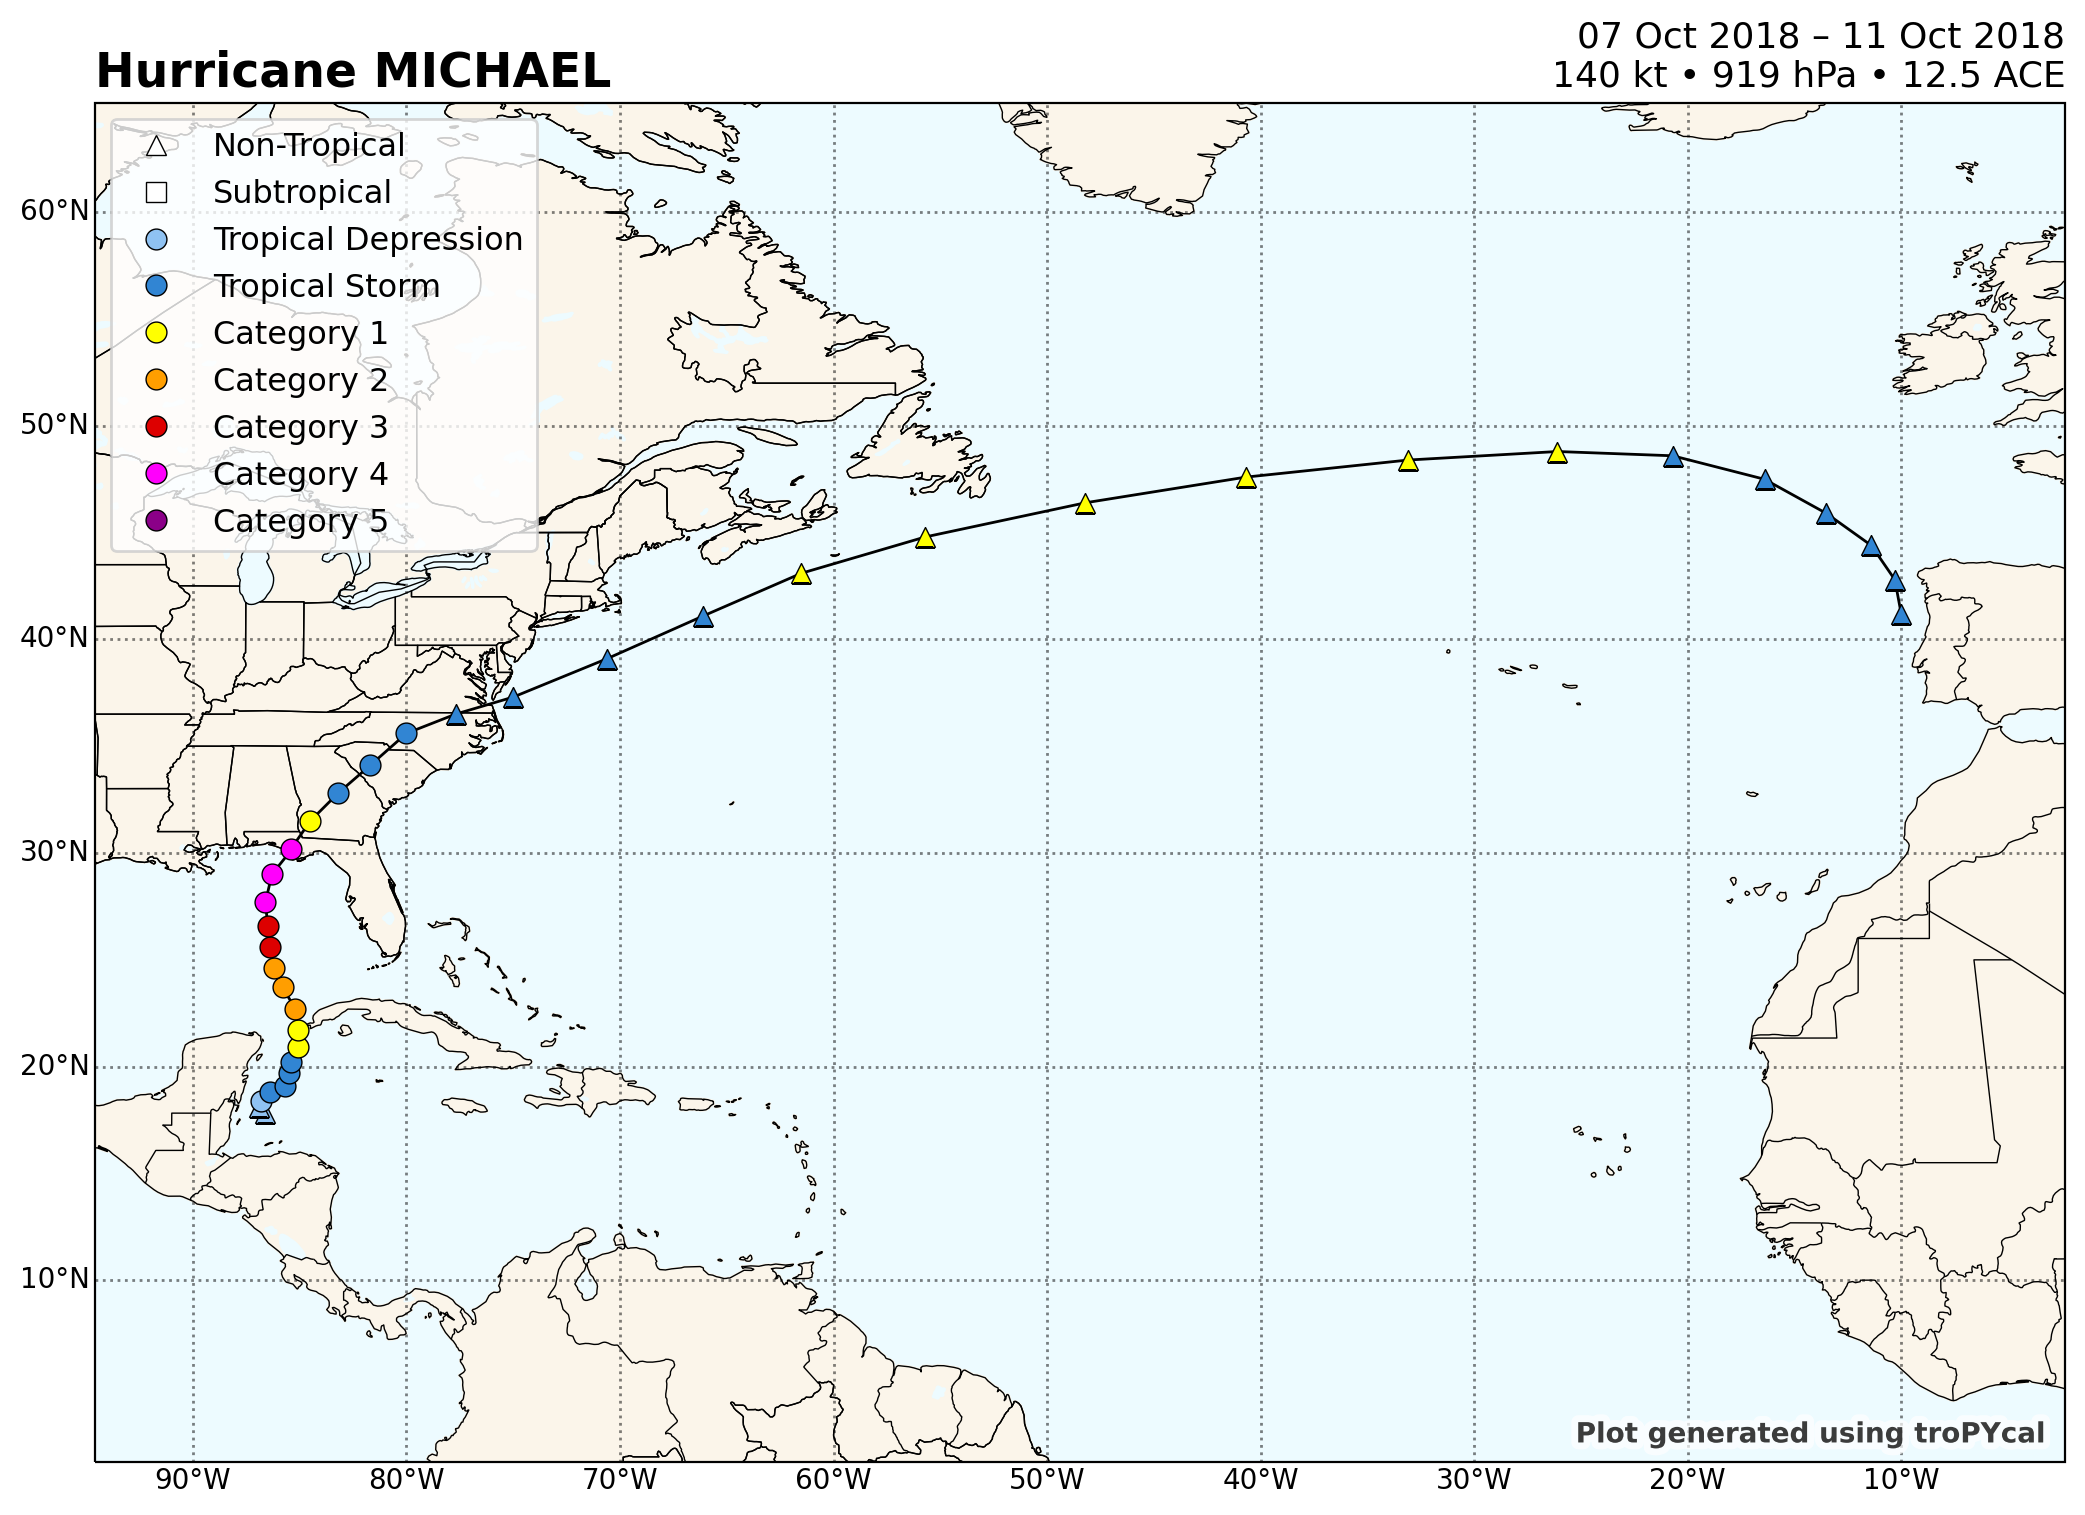

In [8]:
storm.plot(return_ax=True)

Plot the tornado tracks associated with Michael, along with the accompanying daily practically perfect forecast (PPH):

Note: There is currently a bug with this function that outputs 2 axes, a filled one and a blank one. This will be fixed in future updates.



/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/tracks/storm.py:1246: UserWarning: Reading in tornado data for this storm. If you seek to analyze tornado data for multiple storms, run "TrackDataset.assign_storm_tornadoes()" to avoid this warning in the future.


--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2018 (9.51 seconds)


/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/tropycal-0.2.4-py3.8.egg/tropycal/tornado/plot.py:187: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute

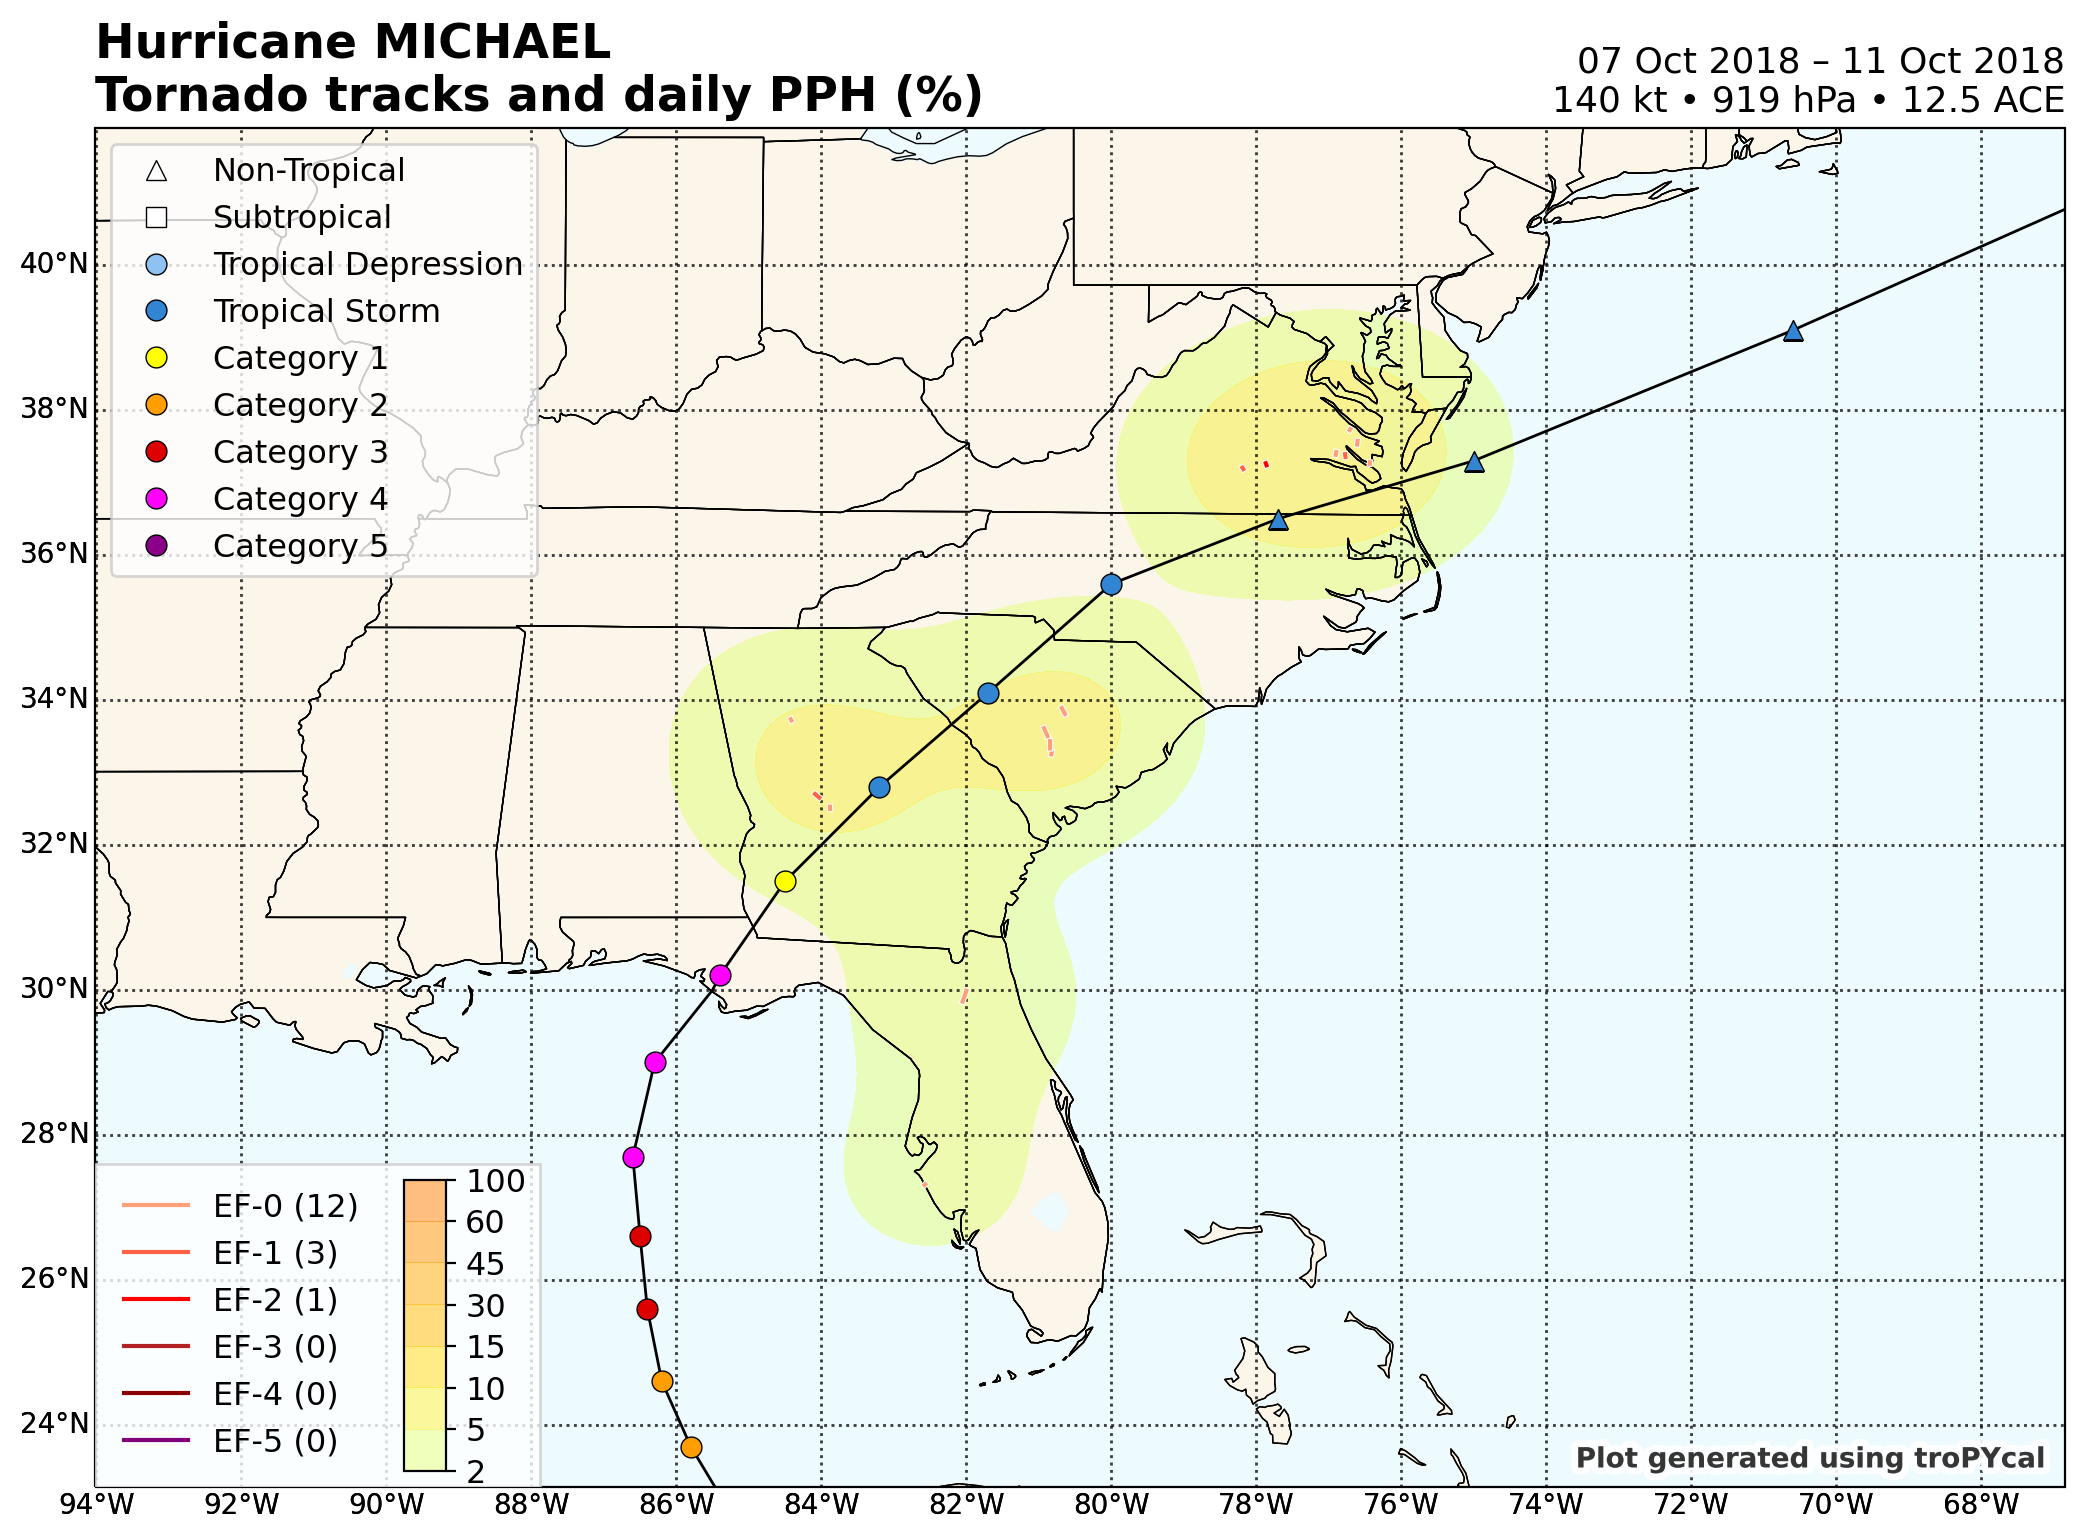

In [9]:
storm.plot_tors(plotPPH=True)

If this storm was ever in NHC's area of responsibility, you can retrieve operational NHC forecast data for this event provided it is available. Forecast discussions date back to 1992, and forecast tracks date back to 1954.

Retrieve a single forecast discussion for Michael:



In [10]:
#Method 1: Specify date closest to desired discussion
disco = storm.get_nhc_discussion(forecast=dt.datetime(2018,10,7,0))
print(disco['text'])

#Method 2: Specify forecast discussion ID
disco = storm.get_nhc_discussion(forecast=2)
#print(disco['text']) printing this would show the same output

ZCZC MIATCDAT4 ALL
TTAA00 KNHC DDHHMM

Potential Tropical Cyclone Fourteen Discussion Number   2
NWS National Hurricane Center Miami FL       AL142018
1000 PM CDT Sat Oct 06 2018

The cloud pattern has improved in organization and surface pressures
are gradually falling, but there is no evidence that the system is
a tropical cyclone at this time.  All indications are, however, that
a tropical depression will likely form at any time soon. Strong wind
shear is expected to affect the disturbance, and the SHIPS model
only show a modest strengthening. This is in contrast to some global
models and the HWRF, which are more aggressive in developing this
system.  Since the environment is marginally favorable, the NHC
forecast only gradually strengthens the system at the rate of the
intensity consensus IVCN.  However, the forecast is highly uncertain
given the solution of the global models.

Since the system does not have a well-defined center, the initial
motion is also uncertain. The best esti

NHC also archives forecast tracks, albeit in a different format than the official advisory data, so the operational forecast IDs here differ from the discussion IDs. As such, the forecast cone is not directly retrieved from NHC, but is generated using an algorithm that yields a cone closely resembling the official NHC cone.

Let's plot Michael's second forecast cone:



/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<GeoAxesSubplot:title={'left':'Potential Tropical Cyclone FOURTEEN','right':'30 mph • 1004 hPa • Forecast #2\nForecast Issued: 0300 UTC 07 Oct 2018'}>

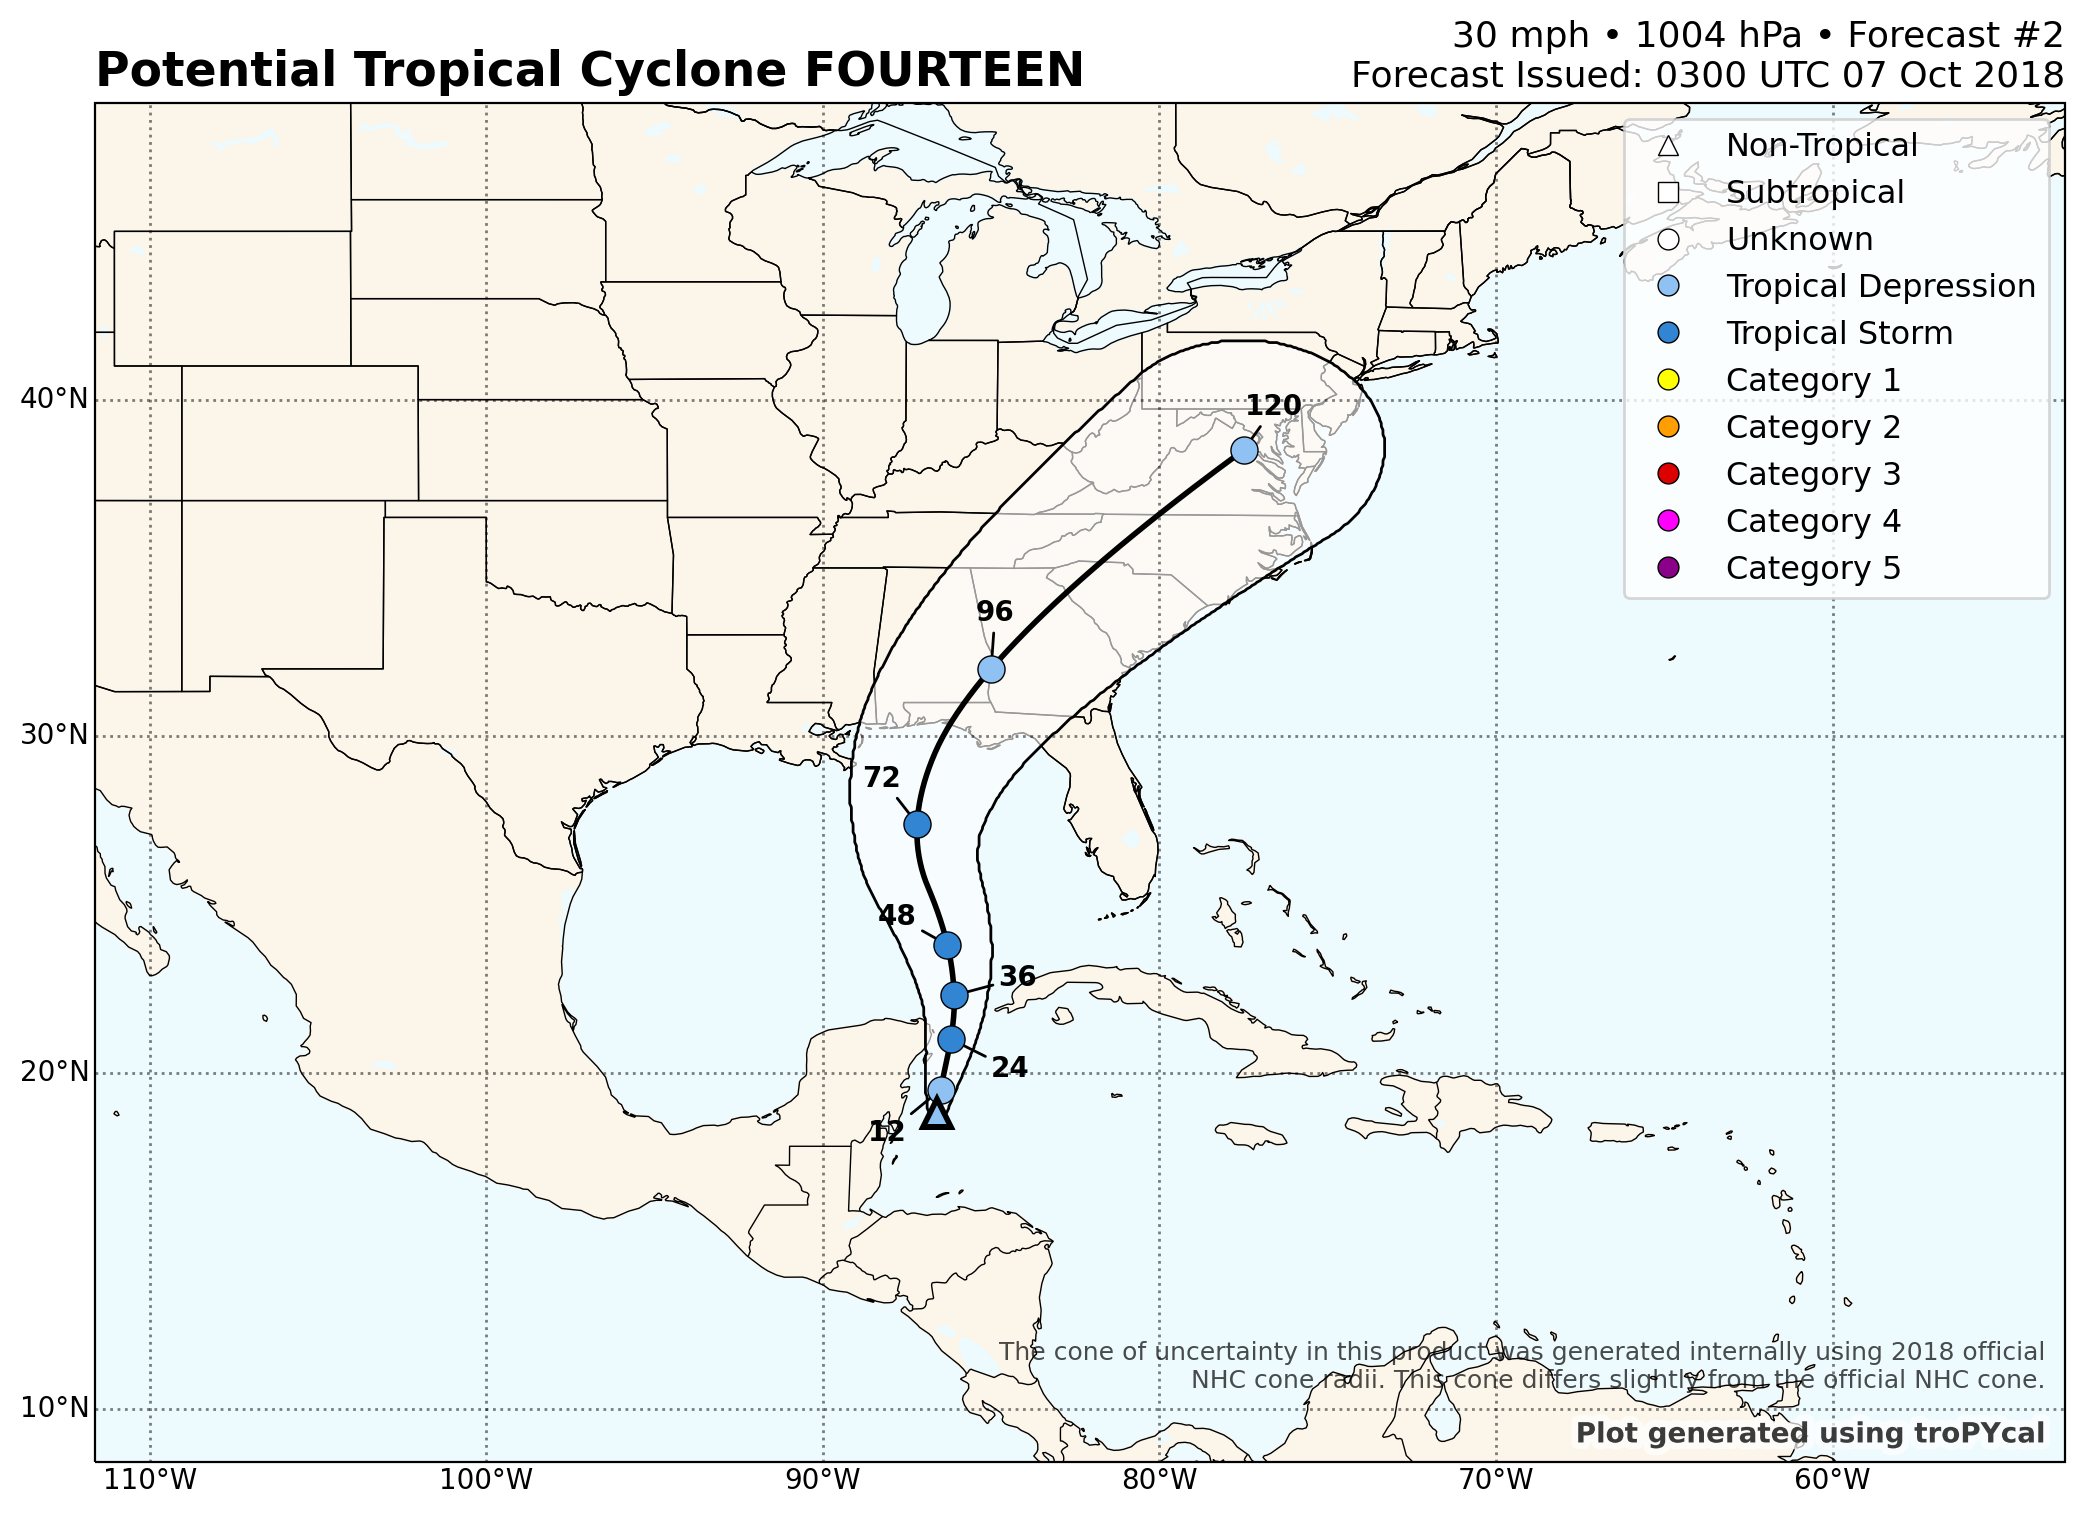

In [11]:
storm.plot_nhc_forecast(forecast=2,return_ax=True)

Now let's look at the 12th forecast for Michael.

Note that the observed track here differs from the HURDAT2 track plotted previously! This is because this plot displays the operationally analyzed location and intensity, rather than the post-storm analysis data. This is done to account for differences between HURDAT2 and operational data.



/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<GeoAxesSubplot:title={'left':'Hurricane MICHAEL','right':'110 mph • 965 hPa • Forecast #12\nForecast Issued: 1500 UTC 09 Oct 2018'}>

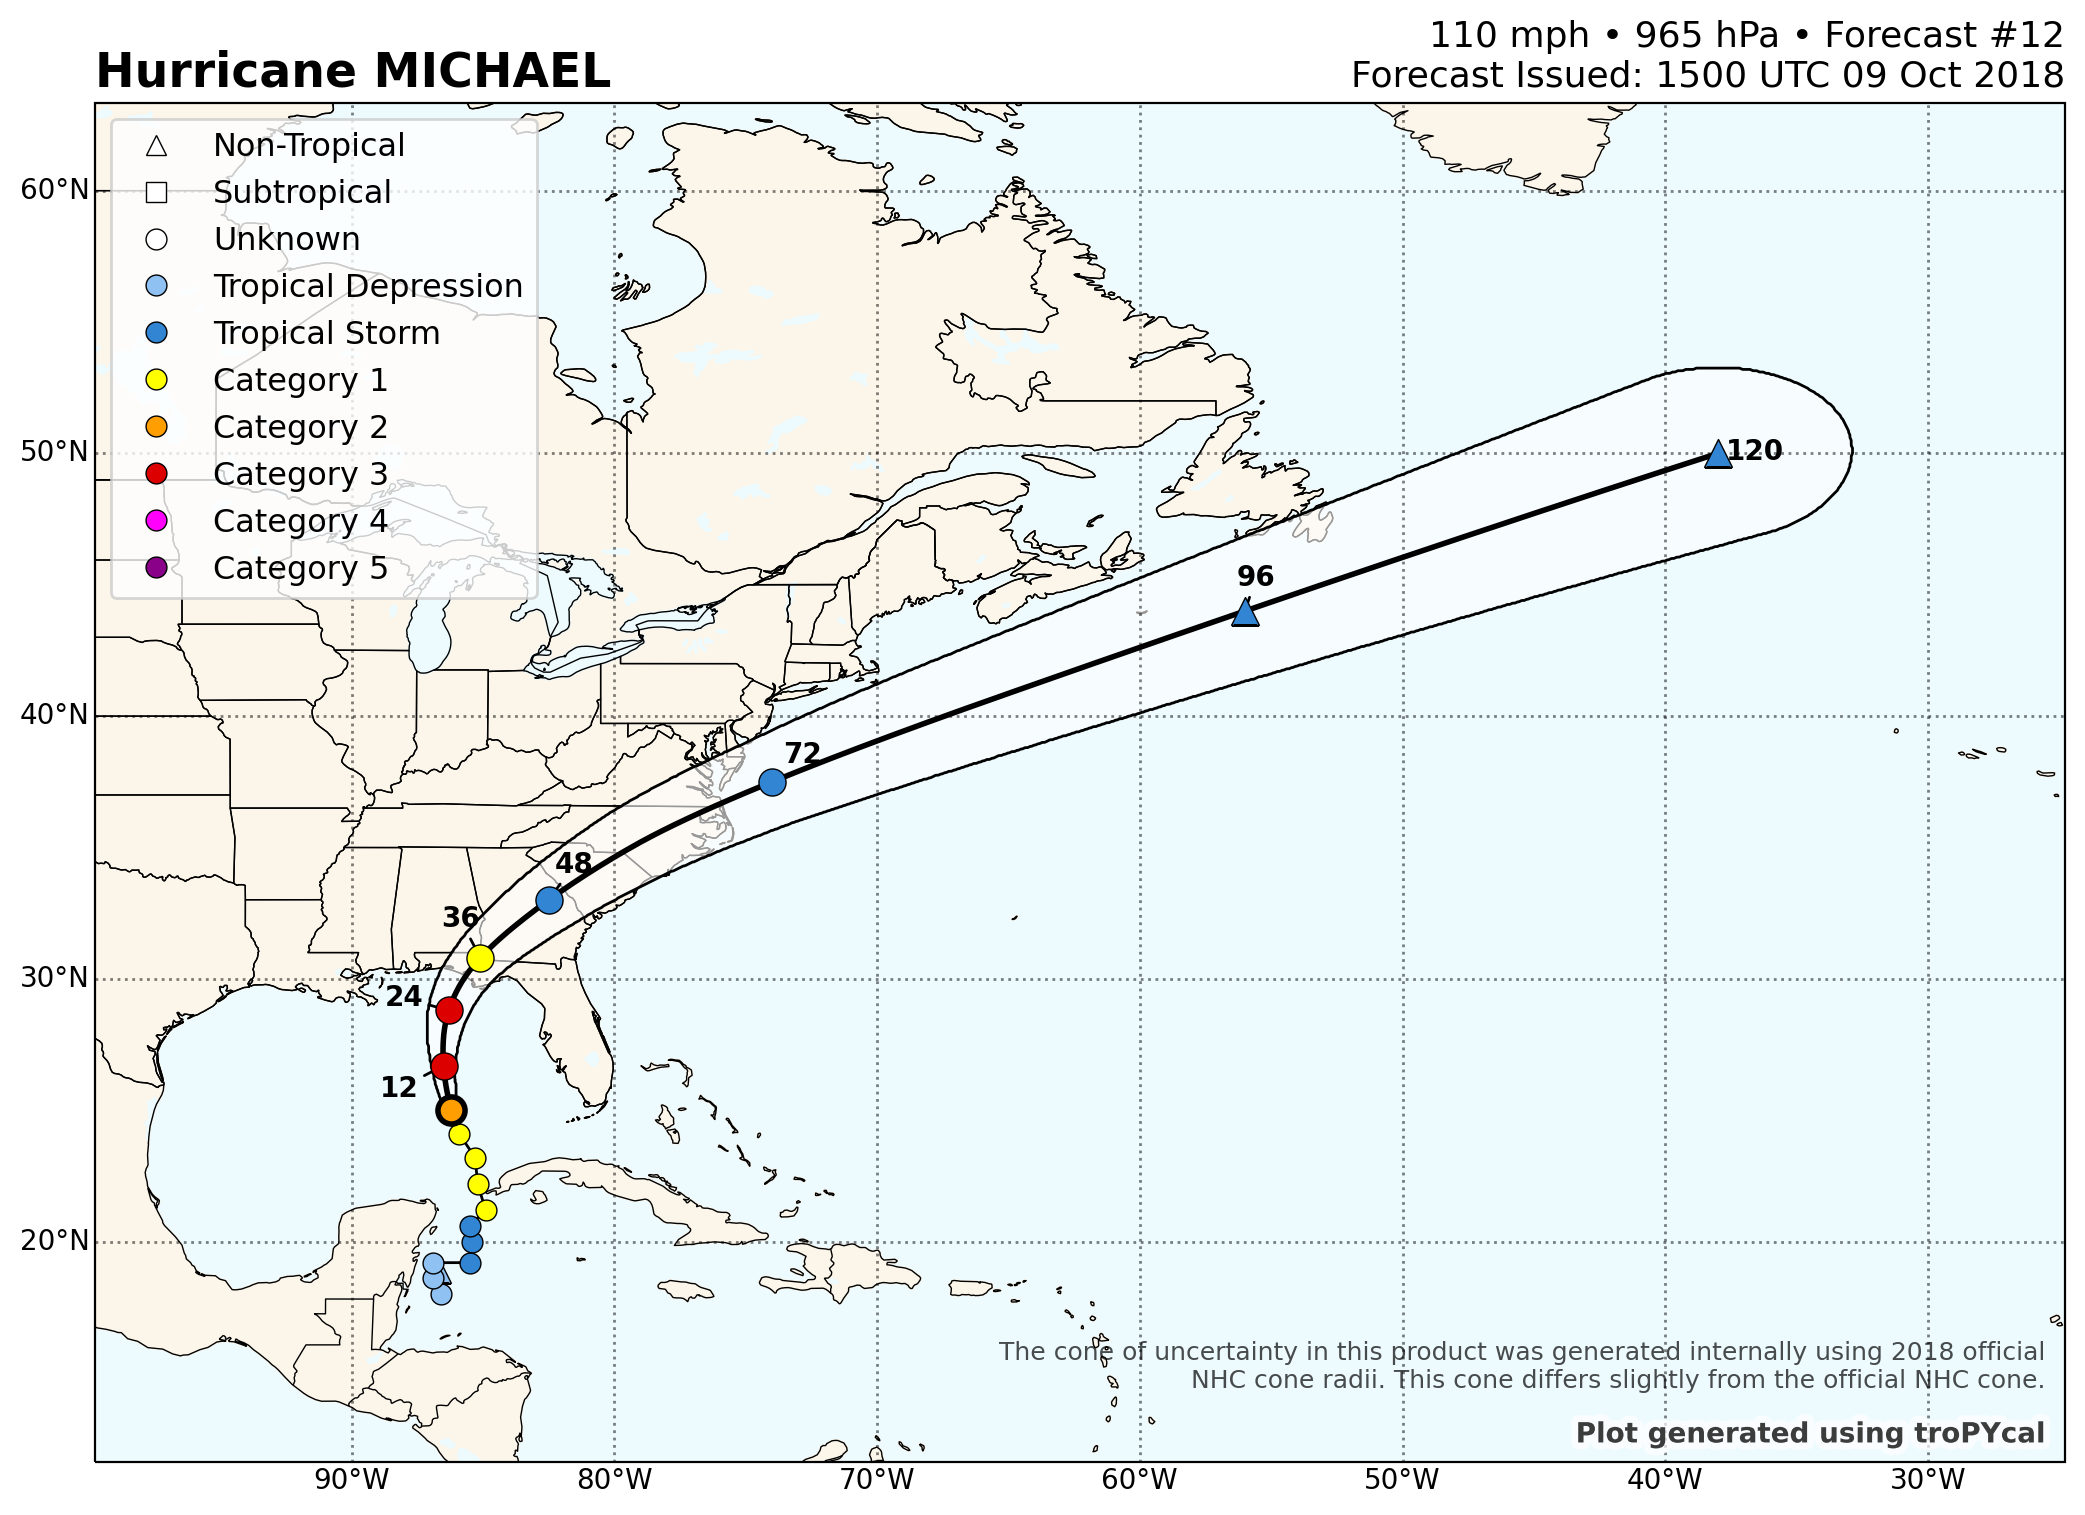

In [12]:
storm.plot_nhc_forecast(forecast=12,return_ax=True)

## IBTrACS Dataset

We can also read in IBTrACS data and use it the same way as we would use HURDAT2 data. There are caveats to using IBTrACS data, however, which are described more in depth in the :doc:`../data` page. We'll retrieve the global IBTrACS dataset, using the Joint Typhoon Warning Center (JTWC) data, modified with the Neumann reanalysis for southern hemisphere storms, and including a special reanalysis for Cyclone Catarina (2004) in Brazil.

<div class="alert alert-danger"><h4>Warning</h4><p>By default, IBTrACS data is read in from an online source. If you're reading in the global IBTrACS dataset, this could be quite slow.  For global IBTrACS, it is recommended to have the CSV file saved locally (`link to data`_), then set the flag ``ibtracs_url="local_path"``.</p></div>




In [13]:
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (396.83 seconds)


The functionality for handling storms in IBTrACS is the same as with using HURDAT2, the only limitation being no NHC and operational model data can be accessed when using IBTrACS as the data source.

`Super Typhoon Haiyan`_ (2013) was a catastrophic storm in the West Pacific basin, having made landfall in the Philippines. With estimated sustained winds of 195 mph (170 kt), it is among one of the most powerful tropical cyclones in recorded history. We can illustrate this by making a plot of Haiyan's observed track and intensity, from JTWC data:




<GeoAxesSubplot:title={'left':'Super Typhoon HAIYAN','right':'03 Nov 2013 – 11 Nov 2013\n170 kt • 895 hPa • 38.2 ACE'}>

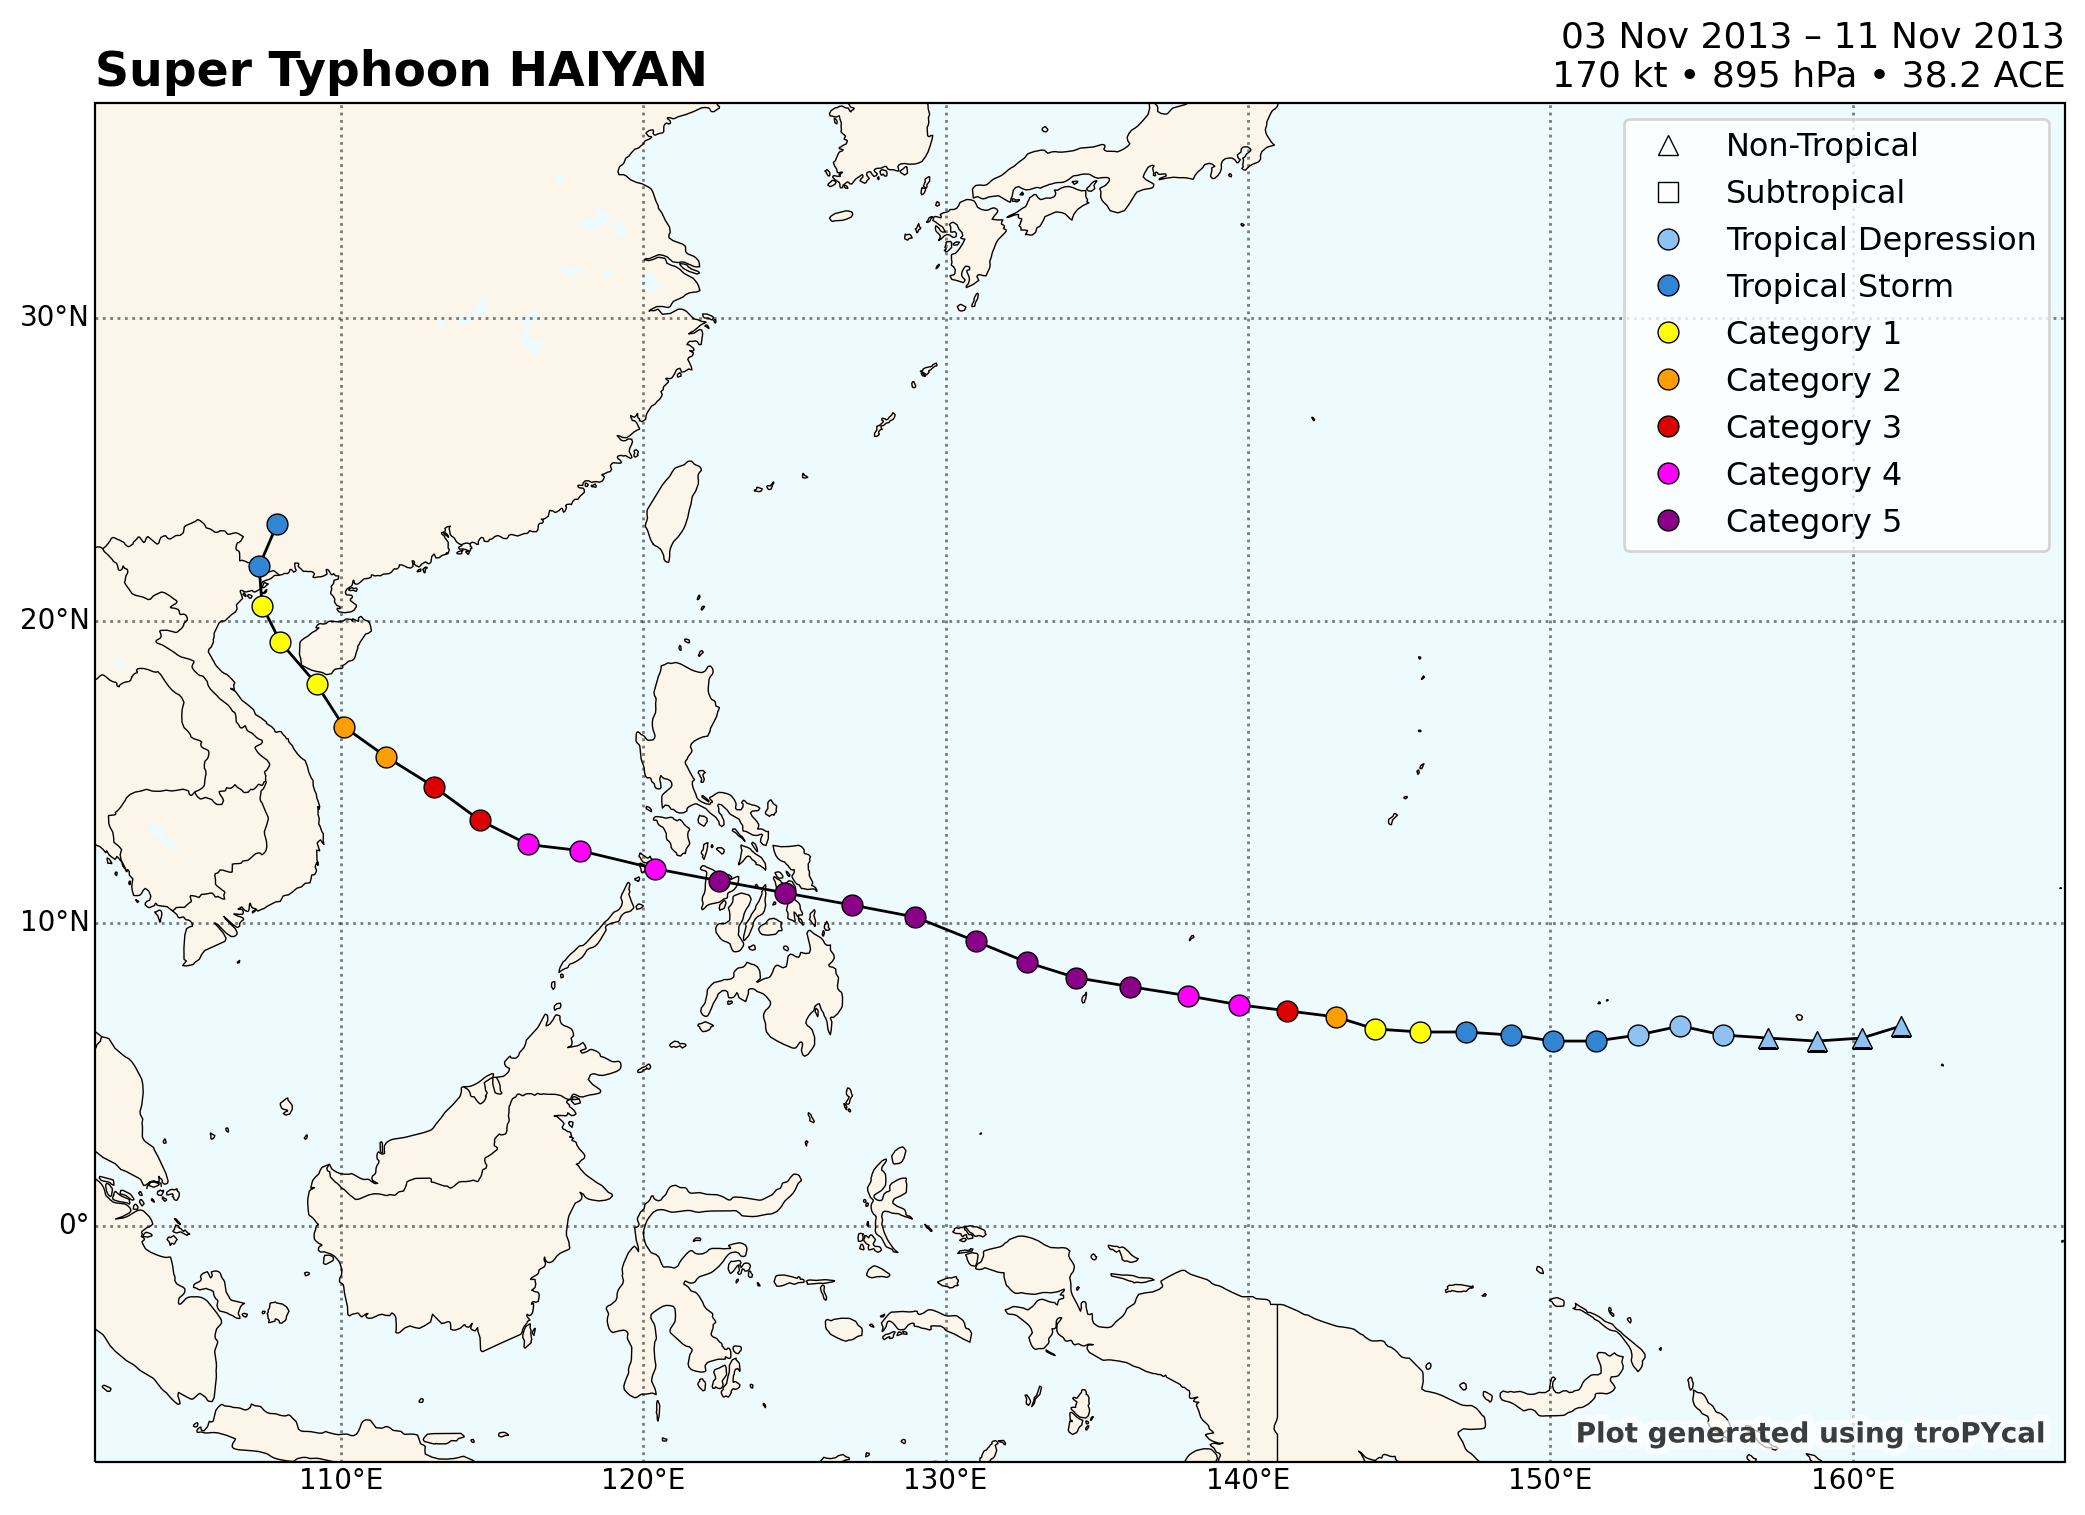

In [14]:
storm = ibtracs.get_storm(('haiyan',2013))
storm.plot(return_ax=True)

`Cyclone Catarina`_ (2004) was an extremely rare hurricane-force tropical cyclone that developed in the South Atlantic basin, which normally doesn't see tropical cyclone activity, and subsequently made landfall in Brazil. The "Catarina" name is unofficial; it was not assigned a name in real time, and JTWC assigned it the ID "AL502004". Recall that when reading in the IBTrACS dataset previously, we set ``Catarina=True``. This read in data for Cyclone Catarina from a special post-storm reanalysis from McTaggart-Cowan et al. (2006). Let's make a plot of Catarina's observed track and intensity per this reanalysis:




<GeoAxesSubplot:title={'left':'Cyclone CATARINA','right':'24 Mar 2004 – 28 Mar 2004\n85 kt • 972 hPa • 7.4 ACE'}>

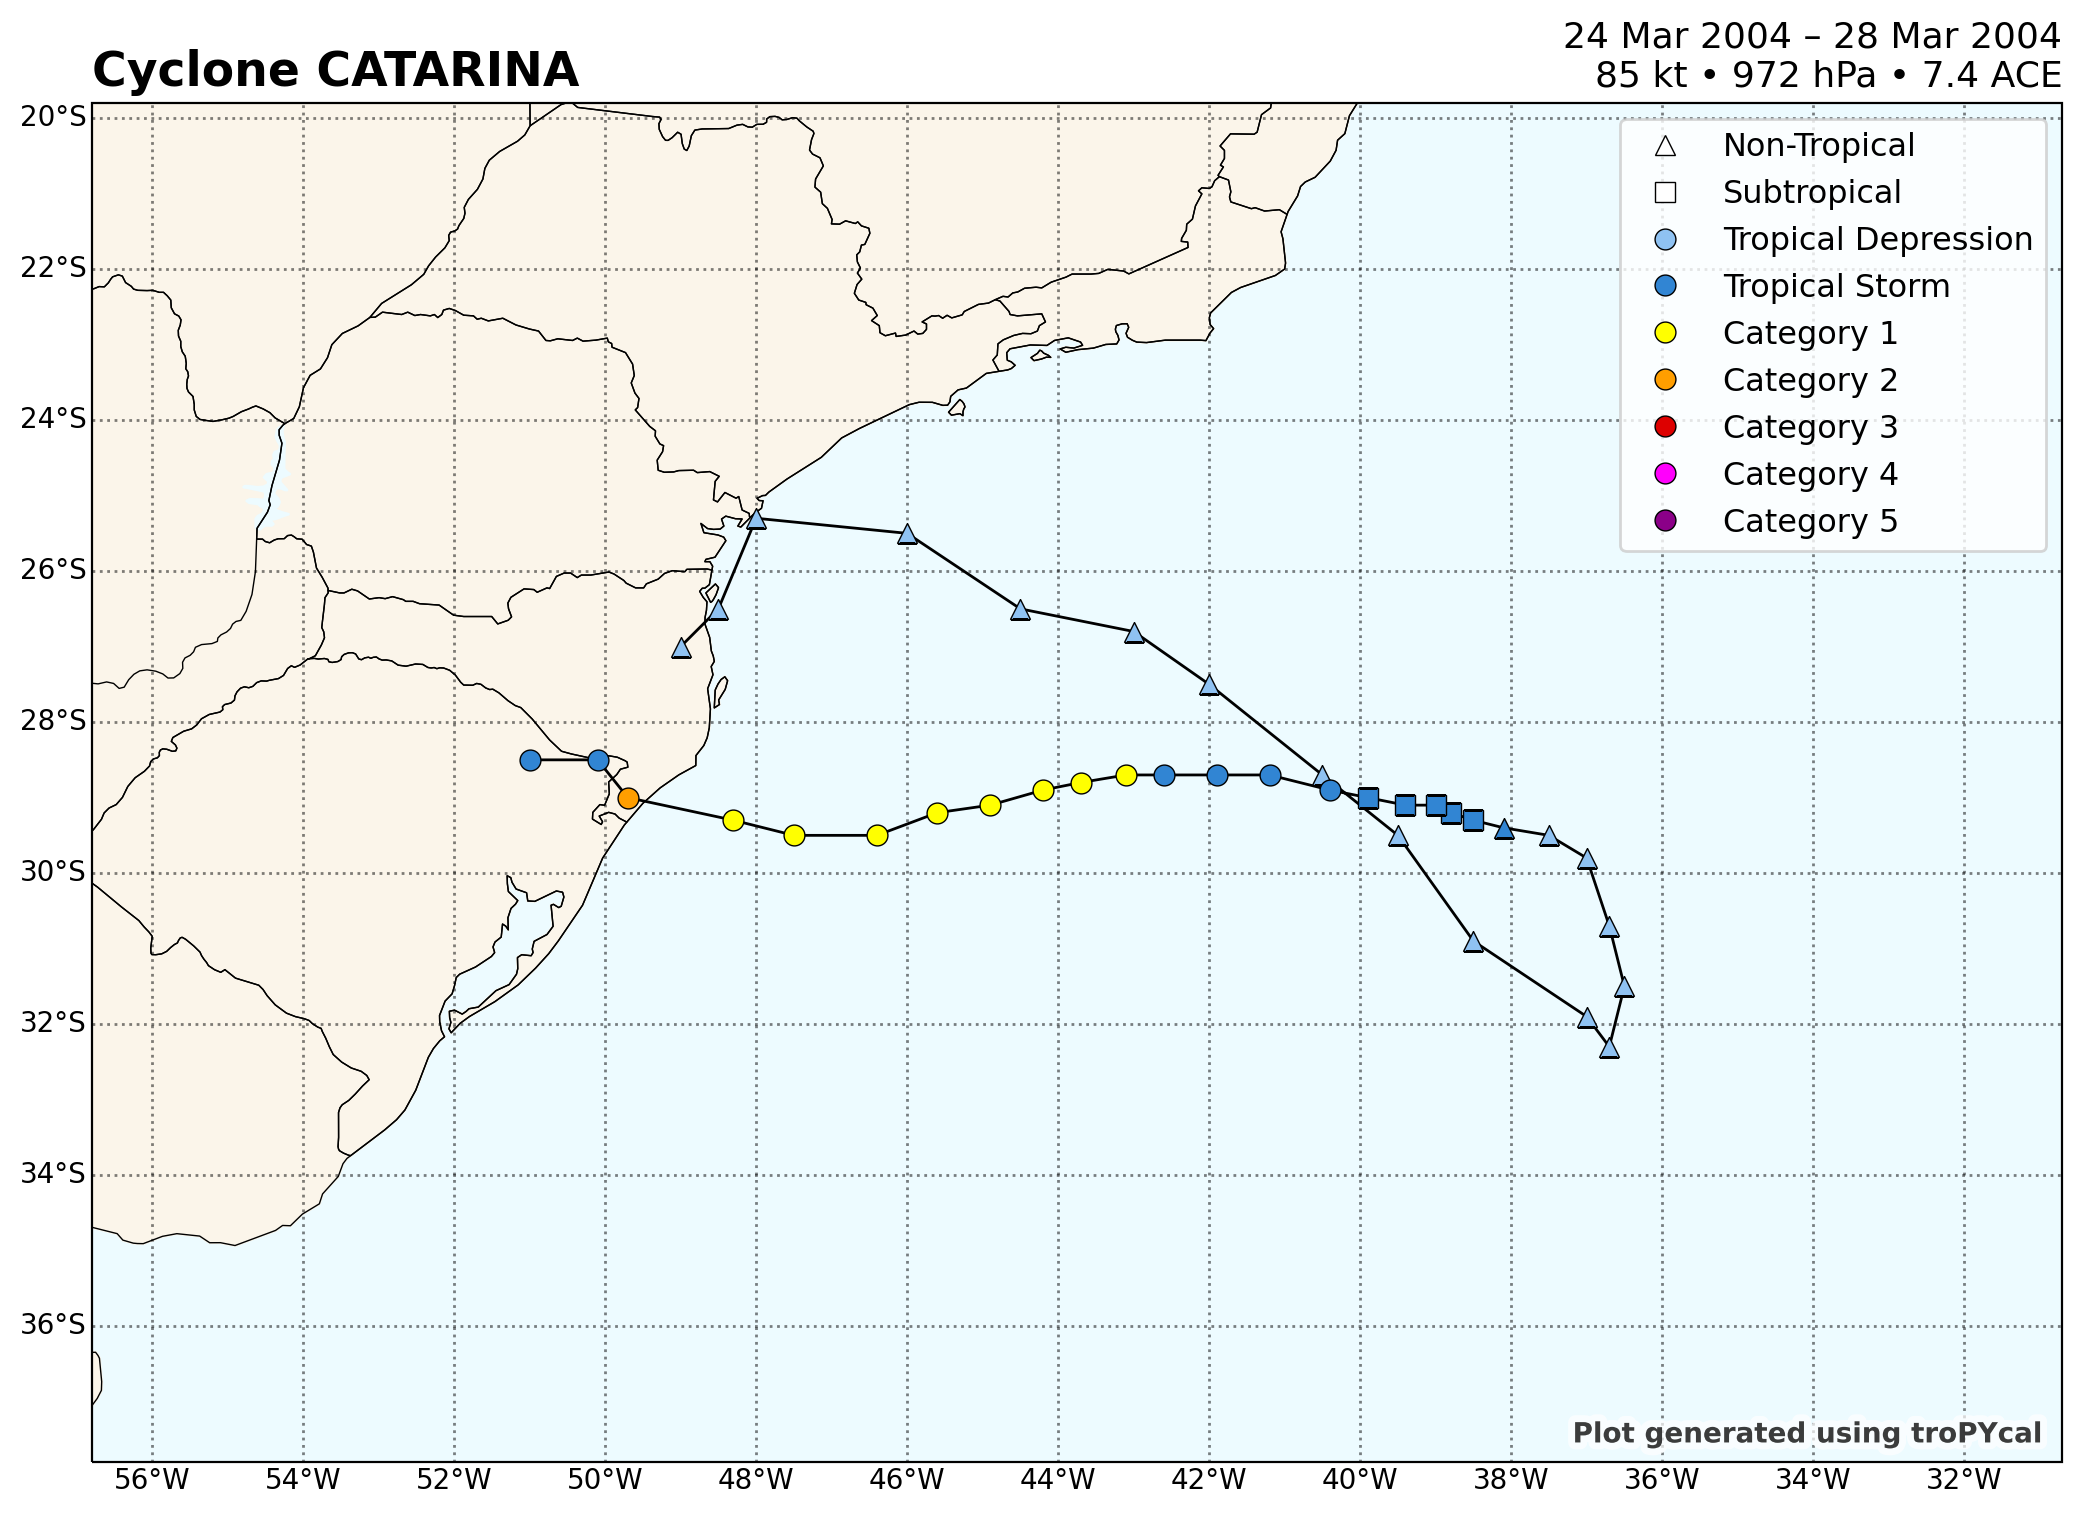

In [15]:
storm = ibtracs.get_storm(('catarina',2004))
storm.plot(return_ax=True)

If we were to read in IBTrACS without setting ``Catarina=True`` (which sets it to False by default) and plot the track for "AL502004", we would get a noticeably different (shorter) and weaker track.

